<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

\begin{align}
\\
\ln \mathcal{L}(\lambda) &= \ln \left( \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} \right) \\
\\
&= \sum_{i=1}^{n} \ln \left( \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} \right) \\
&= \sum_{i=1}^{n} \ln \lambda^{x_{i}} - \ln x_{i}! + \ln \mathcal{e}^{-\lambda}  \\
&= \sum_{i=1}^{n} x_i \ln \lambda - \ln x_{i}! -\lambda  \\
&= \ln \lambda \sum_{i=1}^{n} x_i -   \sum_{i=1}^{n} \ln x_{i}! -n \lambda
\end{align}

To find the MLE we calculate the derivative:
\begin{align}
\frac{\partial \ln \mathcal{L}(\lambda)}{\partial \lambda} &= \frac {\partial}{\partial \lambda} \ln \lambda \sum_{i=1}^{n} x_i -   \sum_{i=1}^{n} \ln x_{i}! -n \lambda \\
&= \frac{1}{\lambda} \sum_{i=1}^{n} x_i -  0 -n  \\
&= \frac{1}{\lambda} \sum_{i=1}^{n} x_i -n  \\
\end{align}

And set it to zero:
\begin{align}
\frac{1}{\hat\lambda} \sum_{i=1}^{n} x_i -n &= 0 \qquad | \cdot \hat\lambda\\
\sum_{i=1}^{n} x_i -n\hat\lambda &= 0 \qquad &| + n \hat\lambda\\
\sum_{i=1}^{n} x_i  &= n\hat\lambda  &| \div n\\
\frac{1}{n}\sum_{i=1}^{n} x_i  &= \hat\lambda \qquad | \div n\\
\\
\\
\\
\\
\\
\end{align}


In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [2]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


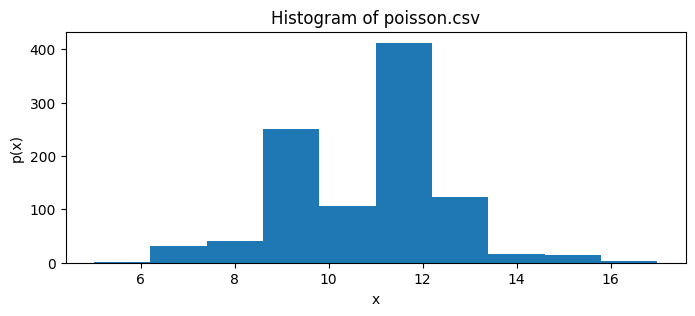

In [3]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [4]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [5]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [6]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ########## YOUR SOLUTION HERE ##########
    n = len(X) 
    lam_max_formula = np.sum(X) /n
    return lam_max_formula

In [7]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [8]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    ########## YOUR SOLUTION HERE ##########
    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)

    lam_max_i = np.argmax(loglikelih)
    lam_max = lam_set[lam_max_i]
    
    return loglikelih, ln_min, ln_max, lam_max

In [9]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

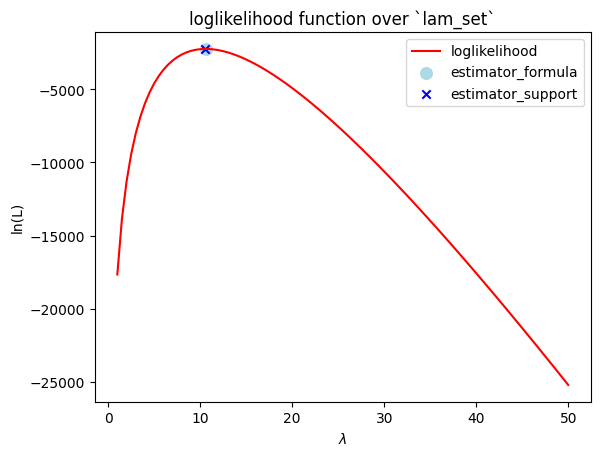

In [10]:
########## YOUR SOLUTION HERE ##########
plt.plot(lam_set, loglikelih, label='loglikelihood', color='r')
plt.scatter([lam_max_formula], [loglikelihood(X, lam_max_formula)],color="lightblue",s=70, label="estimator_formula")
plt.scatter([lam_max], [loglikelihood(X, lam_max)],marker='x',color="b" ,label="estimator_support")

plt.legend()
plt.title("loglikelihood function over `lam_set`")
plt.ylabel("ln(L)")
plt.xlabel('$\lambda$')
plt.show();

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########

The maximum is the stationary point at the 'peak' of the function, where the ln(L) value is the highest and the corresponding lambda.

We can arrive at that point after maximizing the gradient analytically, i.e. by setting the derivative to 0 and solving for the parameter. 

Since we know the Poisson log-likelihood is concave, it only has 1 stationary point, so we can also conclude this is the global maximum, since it's the highest value the ln function can achieve. 

We can also make a very good estimate by argmaxing the ln function and retrieving the parameter out of values from a discrete linspace.

In the plot, I used a light blue circle for the analytical solution and a darker cross for the estimate, showing they're almost the same and have a negligible difference.
